# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


In [2]:
from workspace_utils import active_session

In [3]:
from importlib import reload

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [4]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Solution


In [7]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from ddpg_agent import Agent

def ddpg(n_episodes=200, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations 
        agent.reset()
        score = np.zeros(num_agents)   
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished      
            
            for (state, action, reward, next_state, done) \
                    in zip(states, actions, rewards, next_states, dones):
                agent.step(t,state, action, reward, next_state,done)
                
            states = next_states
            score += rewards
            if np.any(dones):
                break 
                
        avg_score = np.mean(score)
        max_score = np.max(score)
        min_score = np.min(score)
        
        scores_deque.append(avg_score)
        scores.append(score)
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore min: {:.2f}\tScore max: {:.2f}\tScore avg: {:.2f}'.format(i_episode, np.mean(scores_deque), min_score, max_score,avg_score))
        
        if np.mean(scores_deque) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break  
   
    return scores

cuda:0


In [9]:
import ddpg_agent
reload(ddpg_agent)
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

cuda:0


In [10]:
import pickle

In [11]:
with active_session():
    scores = ddpg()
    

Episode 1	Average Score: 1.37	Score min: 0.00	Score max: 2.75	Score avg: 1.37
Episode 2	Average Score: 2.95	Score min: 1.87	Score max: 8.64	Score avg: 4.54
Episode 3	Average Score: 4.96	Score min: 2.21	Score max: 13.73	Score avg: 8.96
Episode 4	Average Score: 6.25	Score min: 4.62	Score max: 20.39	Score avg: 10.14
Episode 5	Average Score: 8.24	Score min: 9.43	Score max: 26.87	Score avg: 16.18
Episode 6	Average Score: 9.50	Score min: 6.23	Score max: 24.91	Score avg: 15.77
Episode 7	Average Score: 11.99	Score min: 12.17	Score max: 38.82	Score avg: 26.97
Episode 8	Average Score: 13.97	Score min: 16.84	Score max: 39.09	Score avg: 27.86
Episode 9	Average Score: 15.69	Score min: 19.12	Score max: 37.93	Score avg: 29.43
Episode 10	Average Score: 17.34	Score min: 23.68	Score max: 36.88	Score avg: 32.20
Episode 11	Average Score: 18.59	Score min: 20.17	Score max: 38.85	Score avg: 31.06
Episode 12	Average Score: 19.72	Score min: 24.16	Score max: 39.21	Score avg: 32.20
Episode 13	Average Score: 20.9

In [12]:
# Open a file and use dump()
with open('scores.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(scores, file)

In [23]:
scores_mean = np.mean(scores, axis=1)

### Plot (Average over all agents)

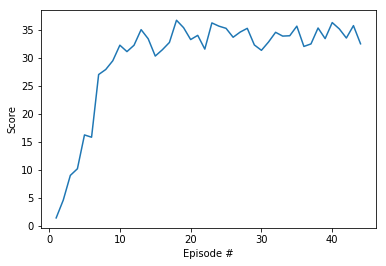

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores_mean)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Plot (All agents separate)

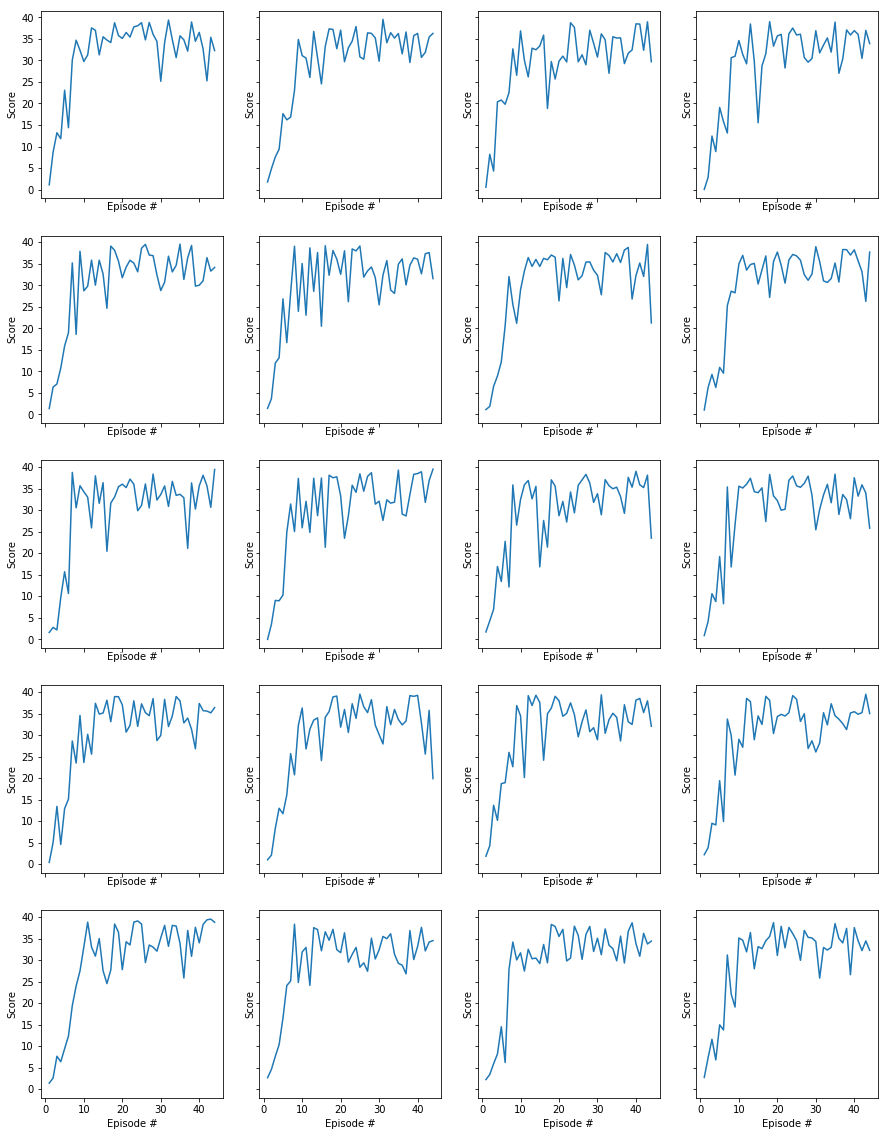

In [27]:
fig, axs = plt.subplots(5, 4, figsize=(15, 20), sharex=True, sharey=True)

axs = axs.flatten()
for idx, (ax, score) in enumerate(zip(axs, np.transpose(scores))):
    ax.plot(np.arange(1, len(scores)+1), score)
    ax.set_ylabel('Score')
    ax.set_xlabel('Episode #')

plt.show()

In [28]:
env.close()